# Animated plots

Note that we must use an interactive backend, or we cannot see the animation in the notebook.
In this case we use the `notebook` backend, allowing us to see the animations inline with the notebook content.

In [1]:
%matplotlib notebook

The animation within matplotlib is provided by `matplotlib.animation`.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 120

We start by making a plot in the same way we did in the static plot.
Note that the plot appears directly below _this_ code cell, but using the `notebook` backend we can continue to modify it.
Just be sure **not** to deactivate the plot using the button in the top right.
If this isn't the desired behaviour, all the code can be placed in one code cell.
We break it up here to explain each part.

Notice that we keep a reference to the lines object returned by the plotting command, this is important and is required for both animation and interactivity.

<IPython.core.display.Javascript object>


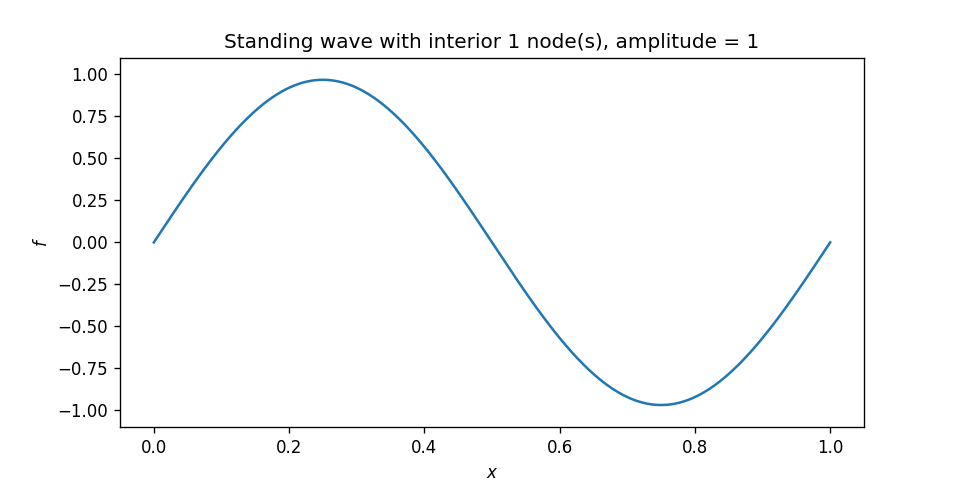

In [3]:
# Set parameters
amplitude = 1
nodes = 1

# Normal plot
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 1000)
y = amplitude*np.sin((nodes + 1)*np.pi*x)
sline, = ax.plot(x, y)

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
_ = ax.set_title(r"Standing wave with interior {} node(s), amplitude = {}".format(nodes, amplitude))
# Underscore supresses output here

We define an update function that changes the plotted line at every timestep `t`.

In [4]:
# Animation update function
# This is called for each frame of the animation
def update(t):
    x = np.linspace(0, 1, 1000)
    y = amplitude*np.cos(2*np.pi*t)*np.sin((nodes + 1)*np.pi*x)
    sline.set_data(x, y)
    return (sline, )

The matplotlib `FuncAnimation` class then takes care of animating the plot.
Note that the time range is specified using frames, this means that one "frame" corresponding to one plot is produced for every value in the provided range and shown in sequence.
The interval parameter determines the time period (in milliseconds) between the next frame being shown.

If `repeat` is true, the animation will start again from the beginning once it reaches the last frame.
Finally, the `blit` parameter produces a smoother animation by only redrawing the parts of the plot that have changed.
In most cases setting this to true is fine, but in others artifacts from the previous frame will break the animation.

In [5]:
# Setup and display the animation
anim = FuncAnimation(fig,
                    update,
                    frames=np.linspace(0, 1, 100),
                    interval=10,
                    repeat=True,
                    blit=True)

plt.show()

It may be desirable to save the animation as a video, which can be done using `anim.save` command which is commented out:

In [6]:
# Saving a video requires ffmpeg or mencoder to be installed.
# The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# 
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])